In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import functions

In [59]:
def prepare_for_plot(dfcount, column, landcover, new_name):
    if column =='count':
        melted = pd.melt(dfcount, id_vars=['D', 'D_year', 'D_month'], var_name='elevation', value_name=new_name) 
        melted = melted.rename(columns={'D_year': 'year', 'D_month': 'month'})
    if column == 'volume':
        melted = pd.melt(dfcount, id_vars=['year', 'month'], var_name='elevation', value_name=new_name)
    
    melted['elevation'] = melted['elevation'].astype(str).str.extract(r'^(\d+)')[0].astype(int)
    melted['elevation_bin'] = melted.apply(functions.bin_elevation500, axis=1)
    # melted = melted.sort_values('elevation_bin')
    melted['date_id'] = melted['year'].astype(str) + "_" + melted['month'].astype(str) + "_" + melted['elevation'].astype(str)
    melted = melted.sort_values('date_id')
    melted['landcover'] = landcover
    return melted 




def count_mean_per_month(df):
    dfcount_mean = df.groupby('month')['dfcount'].mean().reset_index()
    dfcount_mean = dfcount_mean.rename(columns={'dfcount': 'dfcount_month_mean'})
    
    df = df.merge(dfcount_mean, on='month', how='left')
    return(df)




In [60]:
output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'

# ------ Qstl - volume of sediments 

TL1 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL2 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL3 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL4 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL5 = pd.read_csv(output_path + f'langtang_monthly_sum_elevation_Qstl_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)


TL1 = prepare_for_plot(TL1, 'volume', 'landcover 1', 'Qstl')#[['Q100', 'date_id']]
TL2 = prepare_for_plot(TL2, 'volume', 'landcover 2', 'Qstl')#[['Q100', 'date_id']]
TL3 = prepare_for_plot(TL3, 'volume', 'landcover 3', 'Qstl')#[['Q100', 'date_id']]
TL4 = prepare_for_plot(TL4, 'volume', 'landcover 4', 'Qstl')#[['Q100', 'date_id']]
TL5 = prepare_for_plot(TL5, 'volume', 'landcover 5', 'Qstl')#[['Q100', 'date_id']]


# ------ dfcount - total count of sediments per month

# dfspot

dfspot_path = '/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025May_output/dfspot/'

TL1count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover1.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL2count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover2.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL3count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover3.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL4count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover4.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL5count = pd.read_csv(dfspot_path + f'langtang_monthly_dfspot_count_landcover5.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)


TL1count = prepare_for_plot(TL1count, 'count', 'landcover 1', 'dfcount')[['dfcount', 'date_id']]
TL2count = prepare_for_plot(TL2count, 'count', 'landcover 2', 'dfcount')[['dfcount', 'date_id']]
TL3count = prepare_for_plot(TL3count, 'count', 'landcover 3', 'dfcount')[['dfcount', 'date_id']]
TL4count = prepare_for_plot(TL4count, 'count', 'landcover 4', 'dfcount')[['dfcount', 'date_id']]
TL5count = prepare_for_plot(TL5count, 'count', 'landcover 5', 'dfcount')[['dfcount', 'date_id']]



TL1 = TL1.merge(TL1count, on = 'date_id')
TL2 = TL2.merge(TL2count, on = 'date_id')
TL3 = TL3.merge(TL3count, on = 'date_id')
TL4 = TL4.merge(TL4count, on = 'date_id')
TL5 = TL5.merge(TL5count, on = 'date_id')




TL1 = count_mean_per_month(TL1)
TL2 = count_mean_per_month(TL2)
TL3 = count_mean_per_month(TL3)
TL4 = count_mean_per_month(TL4)
TL5 = count_mean_per_month(TL5)

In [61]:
# MUSTANG

output_path = f'/Users/varyabazilova/Desktop/paper2/202406_modelruns/30years/2025Jan_output/TL/'

# ------ Qstl - volume of sediments 

TL1m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_1landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL2m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_2landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL3m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_3landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL4m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_4landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)
TL5m = pd.read_csv(output_path + f'mustang_monthly_sum_elevation_Qstl_5landcover_mm.csv', index_col = 0).fillna(0).reset_index().drop(['folder'], axis = 1)


TL1m = prepare_for_plot(TL1m, 'volume', 'landcover 1', 'Qstl')
TL2m = prepare_for_plot(TL2m, 'volume', 'landcover 2', 'Qstl')
TL3m = prepare_for_plot(TL3m, 'volume', 'landcover 3', 'Qstl')
TL4m = prepare_for_plot(TL4m, 'volume', 'landcover 4', 'Qstl')
TL5m = prepare_for_plot(TL5m, 'volume', 'landcover 5', 'Qstl')



# ------ dfcount - total count of sediments per month



TL1countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover1.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL2countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover2.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL3countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover3.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL4countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover4.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)
TL5countm = pd.read_csv(dfspot_path + f'mustang_monthly_dfspot_count_landcover5.csv', index_col = 0).fillna(0)#.reset_index()#.drop(['folder'], axis = 1)


TL1countm = prepare_for_plot(TL1countm, 'count', 'landcover 1', 'dfcount')[['dfcount', 'date_id']]
TL2countm = prepare_for_plot(TL2countm, 'count', 'landcover 2', 'dfcount')[['dfcount', 'date_id']]
TL3countm = prepare_for_plot(TL3countm, 'count', 'landcover 3', 'dfcount')[['dfcount', 'date_id']]
TL4countm = prepare_for_plot(TL4countm, 'count', 'landcover 4', 'dfcount')[['dfcount', 'date_id']]
TL5countm = prepare_for_plot(TL5countm, 'count', 'landcover 5', 'dfcount')[['dfcount', 'date_id']]



TL1m = TL1m.merge(TL1countm, on = 'date_id')
TL2m = TL2m.merge(TL2countm, on = 'date_id')
TL3m = TL3m.merge(TL3countm, on = 'date_id')
TL4m = TL4m.merge(TL4countm, on = 'date_id')
TL5m = TL5m.merge(TL5countm, on = 'date_id')




TL1m = count_mean_per_month(TL1m)
TL2m = count_mean_per_month(TL2m)
TL3m = count_mean_per_month(TL3m)
TL4m = count_mean_per_month(TL4m)
TL5m = count_mean_per_month(TL5m)

In [62]:
TL5m



,year,month,elevation,Qstl,elevation_bin,date_id,landcover,dfcount,dfcount_month_mean
0,1989,10,2546,0.0,2500 - 3000,1989_10_2546,landcover 5,0,0.007089
1,1989,10,2571,0.0,2500 - 3000,1989_10_2571,landcover 5,0,0.007089
2,1989,10,2779,0.0,2500 - 3000,1989_10_2779,landcover 5,0,0.007089
3,1989,10,2886,0.0,2500 - 3000,1989_10_2886,landcover 5,0,0.007089
4,1989,10,2981,0.0,2500 - 3000,1989_10_2981,landcover 5,0,0.007089
...,...,...,...,...,...,...,...,...,...
86541,2022,9,5895,0.0,5500 - 6000,2022_9_5895,landcover 5,0,0.109687
86542,2022,9,5908,0.0,5500 - 6000,2022_9_5908,landcover 5,0,0.109687
86543,2022,9,5909,0.0,5500 - 6000,2022_9_5909,landcover 5,0,0.109687
86544,2022,9,5960,0.0,5500 - 6000,2022_9_5960,landcover 5,0,0.109687


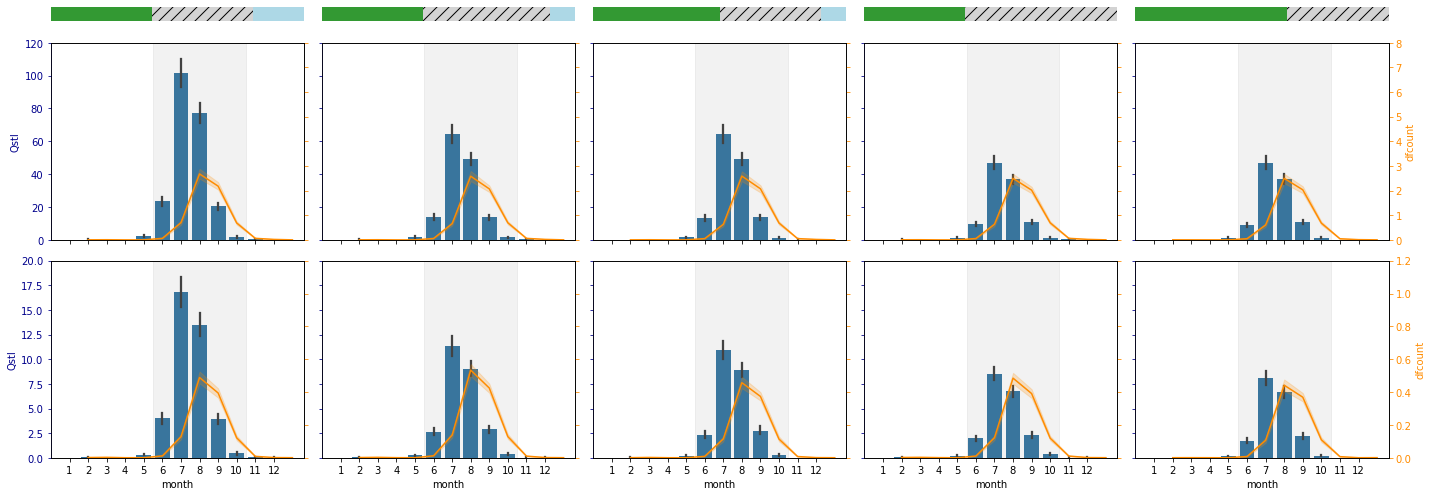

In [63]:
fig = plt.figure(figsize=(20, 7), layout='tight')

mosaic = fig.subplot_mosaic('''
                            klmno
                            abcde
                            abcde
                            abcde
                            abcde
                            abcde
                            abcde
                            ABCDE
                            ABCDE
                            ABCDE
                            ABCDE
                            ABCDE
                            ABCDE
                            ''')

# LANGTAG - volume
sns.barplot(data = TL1, x = 'month', y = 'Qstl', ax = mosaic['a'])#, legend = True,  hue ='dfcount_mean', palette = palette)
sns.barplot(data = TL2, x = 'month', y = 'Qstl', ax = mosaic['b'])#, legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL3, x = 'month', y = 'Qstl', ax = mosaic['c'])#, legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL4, x = 'month', y = 'Qstl', ax = mosaic['d'])#, legend = False, hue = 'dfcount_mean', palette = palette)
sns.barplot(data = TL5, x = 'month', y = 'Qstl', ax = mosaic['e'])#, legend = True,  hue = 'dfcount_mean',  palette = palette)


# MUSTANG - volume
sns.barplot(data = TL1m, x = 'month', y = 'Qstl', ax = mosaic['A'])#, legend = True,)
sns.barplot(data = TL2m, x = 'month', y = 'Qstl', ax = mosaic['B'])#, legend = False)
sns.barplot(data = TL3m, x = 'month', y = 'Qstl', ax = mosaic['C'])#, legend = False)
sns.barplot(data = TL4m, x = 'month', y = 'Qstl', ax = mosaic['D'])#, legend = False)
sns.barplot(data = TL5m, x = 'month', y = 'Qstl', ax = mosaic['E'])#, legend = True,)



# Secondary axis
axa = mosaic['a'].twinx()
axb = mosaic['b'].twinx()
axc = mosaic['c'].twinx()
axd = mosaic['d'].twinx()
axe = mosaic['e'].twinx()

axA = mosaic['A'].twinx()
axB = mosaic['B'].twinx()
axC = mosaic['C'].twinx()
axD = mosaic['D'].twinx()
axE = mosaic['E'].twinx()



# LANGTAG - count
sns.lineplot(data = TL1, x = 'month', y = 'dfcount', ax = axa,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL2, x = 'month', y = 'dfcount', ax = axb,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL3, x = 'month', y = 'dfcount', ax = axc,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL4, x = 'month', y = 'dfcount', ax = axd,  color = 'darkorange')#, color = 'pink')
sns.lineplot(data = TL5, x = 'month', y = 'dfcount', ax = axe,  color = 'darkorange')#, color = 'pink')


# MUSTANG - count
sns.lineplot(data = TL1m, x = 'month', y = 'dfcount', ax = axA, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL2m, x = 'month', y = 'dfcount', ax = axB, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL3m, x = 'month', y = 'dfcount', ax = axC, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL4m, x = 'month', y = 'dfcount', ax = axD, color = 'darkorange')#, errorbar = 'se',  legend = False)
sns.lineplot(data = TL5m, x = 'month', y = 'dfcount', ax = axE, color = 'darkorange')#, errorbar = 'se',  legend = False)





# LAYOUT 
# Desired color for secondary axes
color = 'darkorange'
# List of all twin axes
empty_axes = [axa, axb, axc, axd, axA, axB, axC, axD]

for ax in empty_axes:
    ax.tick_params(axis='y', colors=color)
    ax.set_yticklabels([])
    ax.set_ylabel('')

orange_axes = [axe, axE]


# Loop to style the twin axes
for ax in orange_axes:
    ax.tick_params(axis='y', colors=color)           # Tick color
    # ax.spines['right'].set_color(color)              # Spine color
    ax.yaxis.label.set_color(color)                  # Axis label color (if used)


# # THIS IS AXIS PART 


for key in ['b', 'c', 'd', 'e', 'B', 'C', 'D', 'E']:
    mosaic[key].set_yticklabels([])
    mosaic[key].set_ylabel('')

for key in ['a', 'b', 'c', 'd', 'e']:
    mosaic[key].set_xticklabels([])
    mosaic[key].set_xlabel('')


# # ORANGE PART

for ax in [axa, axb, axc, axd, axe]:
    ax.set_ylim(0, 8)

for ax in [axA, axB, axC, axD, axE]:
    ax.set_ylim(0, 1.2)

# BARS

for key in ['a', 'b', 'c', 'd', 'e']:
    mosaic[key].set_ylim(0, 120)

for key in ['A', 'B', 'C', 'D', 'E']:
    mosaic[key].set_ylim(0, 20)



# List of left-side axes (primary y-axes)
blue_axes = [mosaic[key] for key in ['a', 'b', 'c', 'd', 'e', 'A', 'B', 'C', 'D', 'E']]

# Apply blue styling to left axes
for ax in blue_axes:
    ax.tick_params(axis='y', colors='darkblue')     # Tick color
    ax.yaxis.label.set_color('darkblue')            # Label color
    ax.spines['left'].set_color('darkblue')         # Optional: spine color








# ADD LANDCOVER 
# Iterate over the bar row and create the proportional bars

# Define color proportions for each panel (Green, Yellow, Gray)
shares = [
    (40, 40, 20),  # First bar: 40% green (veg) , 30% grey (bedrock), 30% blue (glacier)
    (40, 50, 10),
    (50, 40, 10),
    (40, 60, 00),
    (60, 40, 00),
]

for i, key in enumerate("klmno"):
    bar_ax = mosaic[key]  # Select the correct subplot for the bar

    # Remove ticks, labels, and spines
    bar_ax.set_xticks([])
    bar_ax.set_yticks([])
    bar_ax.set_frame_on(False)

    # Extract proportions (must sum to 100%)
    p1, p2, p3 = shares[i]  # Green, Yellow, Gray

    # Convert percentages to width (normalized to 1)
    p1 /= 100
    p2 /= 100
    p3 /= 100

    # Plot the three segments
    bar_ax.barh(0, p1, height=4, color='green', align='center', alpha=0.8)
    bar_ax.barh(0, p2, height=4, color='lightgray', left=p1, align='center', hatch = '//')
    bar_ax.barh(0, p3, height=4, color='lightblue', left=p1 + p2, align='center')
    bar_ax.set_xlim(0, 1)

# List of subplot keys where the grey background should be applied
target_axes = ['a', 'b', 'c', 'd', 'e','A', 'B', 'C', 'D', 'E']

# Apply axvspan **only to the target axes**
for key in target_axes:
    mosaic[key].axvspan(5 - 0.5, 9 + 0.5, color='grey', alpha=0.1)



outpath = '/Users/varyabazilova/Desktop/paper2/plots_experiments/'
# plt.savefig(outpath + 'monthly_volume_and_count.png', dpi = 300, bbox_inches = 'tight')

# plot for different elevations 

# LANGTNAG

In [64]:

def group_data(data, landcover_idx):
    grouped = (
        data.groupby(['month', 'elevation_bin'])['Qstl']
        .mean()
        .reset_index()
    )
    # Rename the 'Qstl' column to include the landcover index
    grouped = grouped.rename(columns={'Qstl': f'Qstl{landcover_idx}'})
    return grouped

dataframes = [TL1, TL2, TL3, TL4, TL5]
grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx)
    grouped_dfs.append(grouped)


from functools import reduce

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_df = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)

In [65]:
combined_df

,month,elevation_bin,Qstl1,Qstl2,Qstl3,Qstl4,Qstl5
0,1,2500,0.425430,0.418901,0.112147,0.608376,0.107545
1,1,2500 - 3000,0.318141,0.415614,0.110148,0.416845,0.107474
2,1,3000 - 3500,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,3500 - 4000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4000 - 4500,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
103,12,4000 - 4500,0.000000,0.000000,0.000000,0.000000,0.000000
104,12,4500 - 5000,0.000000,0.000000,0.000000,0.000000,0.000000
105,12,5000 - 5500,0.000000,0.000000,0.000000,0.000000,0.000000
106,12,5500 - 6000,0.000000,0.000000,0.000000,0.000000,0.000000


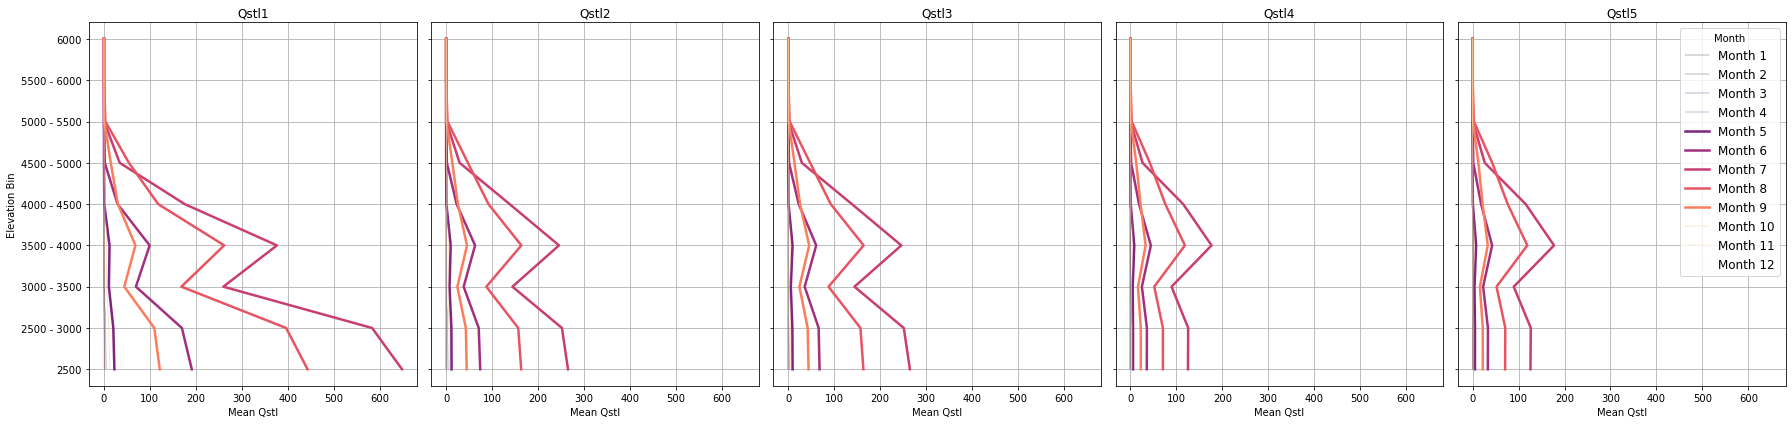

In [66]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm

# Melt the combined_df
mean_df = combined_df.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique variables and months
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
elevation_bins = sorted(mean_df['elevation_bin'].unique())

# Create magma colormap
cmap = cm.get_cmap('magma', len(months))
colors = [cmap(i) for i in range(len(months))]

num_vars = len(variables)
fig, axes = plt.subplots(1, num_vars, figsize=(25, 6), sharey=True, sharex = True)

# Ensure axes is always iterable
if num_vars == 1:
    axes = [axes]

for ax, var in zip(axes, variables):
    df_var = mean_df[mean_df['variable'] == var]

    for i, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[i],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Qstl')
    ax.grid(True)

axes[0].set_ylabel('Elevation Bin')

# Add legend to the upper right corner **inside** the first panel
axes[4].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize=12,
)

plt.tight_layout()



# MUSTANG

In [67]:
dataframes = [TL1m, TL2m, TL3m, TL4m, TL5m]
grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx)
    grouped_dfs.append(grouped)


from functools import reduce

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_dfm = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)

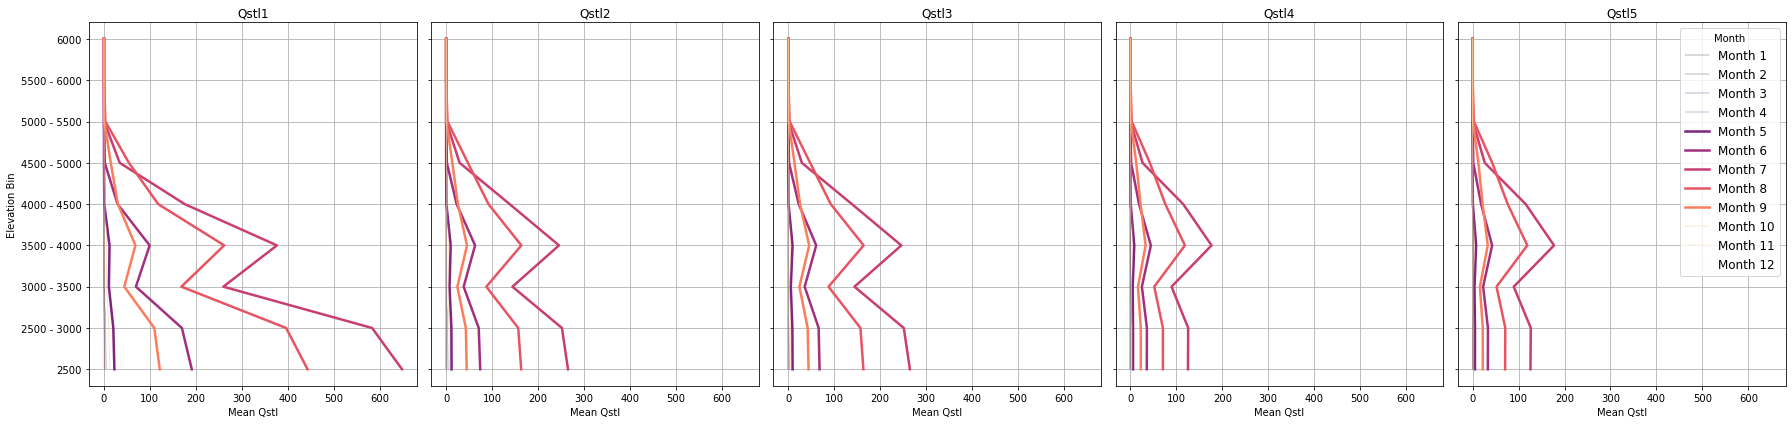

In [68]:

# Melt the combined_df
mean_dfm = combined_dfm.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique variables and months
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
elevation_bins = sorted(mean_df['elevation_bin'].unique())

# Create magma colormap
cmap = cm.get_cmap('magma', len(months))
colors = [cmap(i) for i in range(len(months))]

num_vars = len(variables)
fig, axes = plt.subplots(1, num_vars, figsize=(25, 6), sharey=True, sharex = True)

# Ensure axes is always iterable
if num_vars == 1:
    axes = [axes]

for ax, var in zip(axes, variables):
    df_var = mean_df[mean_df['variable'] == var]

    for i, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[i],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Qstl')
    ax.grid(True)

axes[0].set_ylabel('Elevation Bin')

# Add legend to the upper right corner **inside** the first panel
axes[4].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize=12,
)

plt.tight_layout()



# LANGTANG

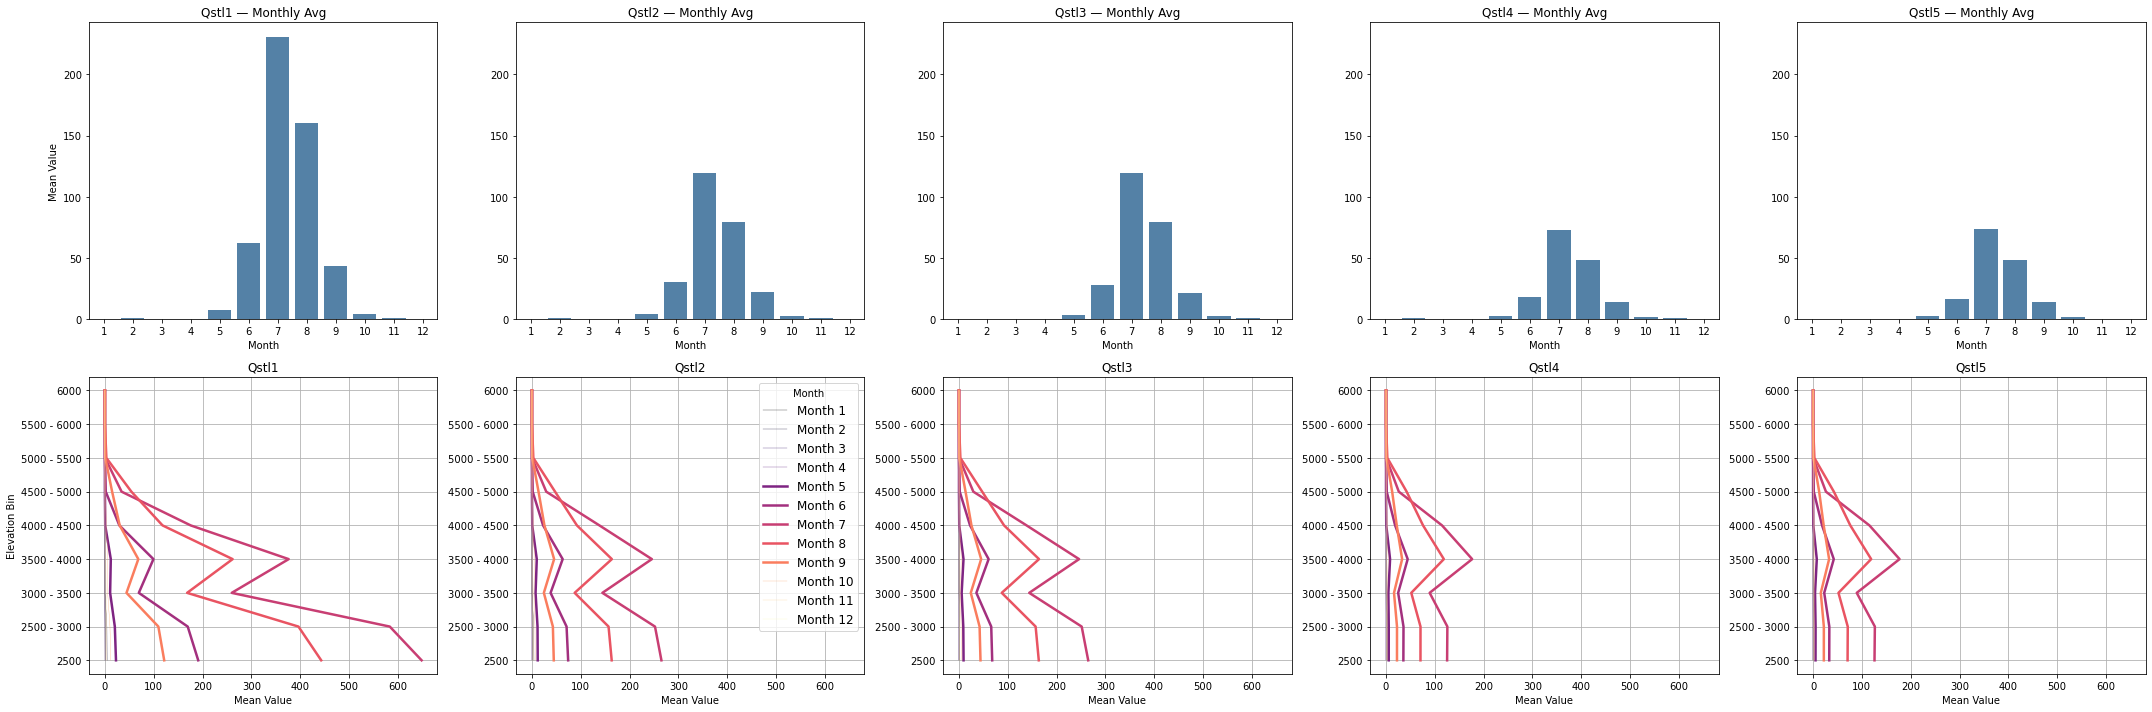

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

# Melt the combined_df
mean_df = combined_df.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Get unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
elevation_bins = sorted(mean_df['elevation_bin'].unique())
num_vars = len(variables)

# Color map for line plots
cmap = cm.get_cmap('magma', len(months))
colors = [cmap(i) for i in range(len(months))]

# Create figure
fig = plt.figure(figsize=(6*num_vars, 10))

# Create subplots manually
bar_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plots (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)

    # Line plots (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots (monthly mean) ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()

    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )

    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')

# --- Bottom row: line plots per month ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for j, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[j],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')

# Add legend to first line plot (bottom-left)
line_axes[1].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize=12,
)

plt.tight_layout()


# MUSTANG

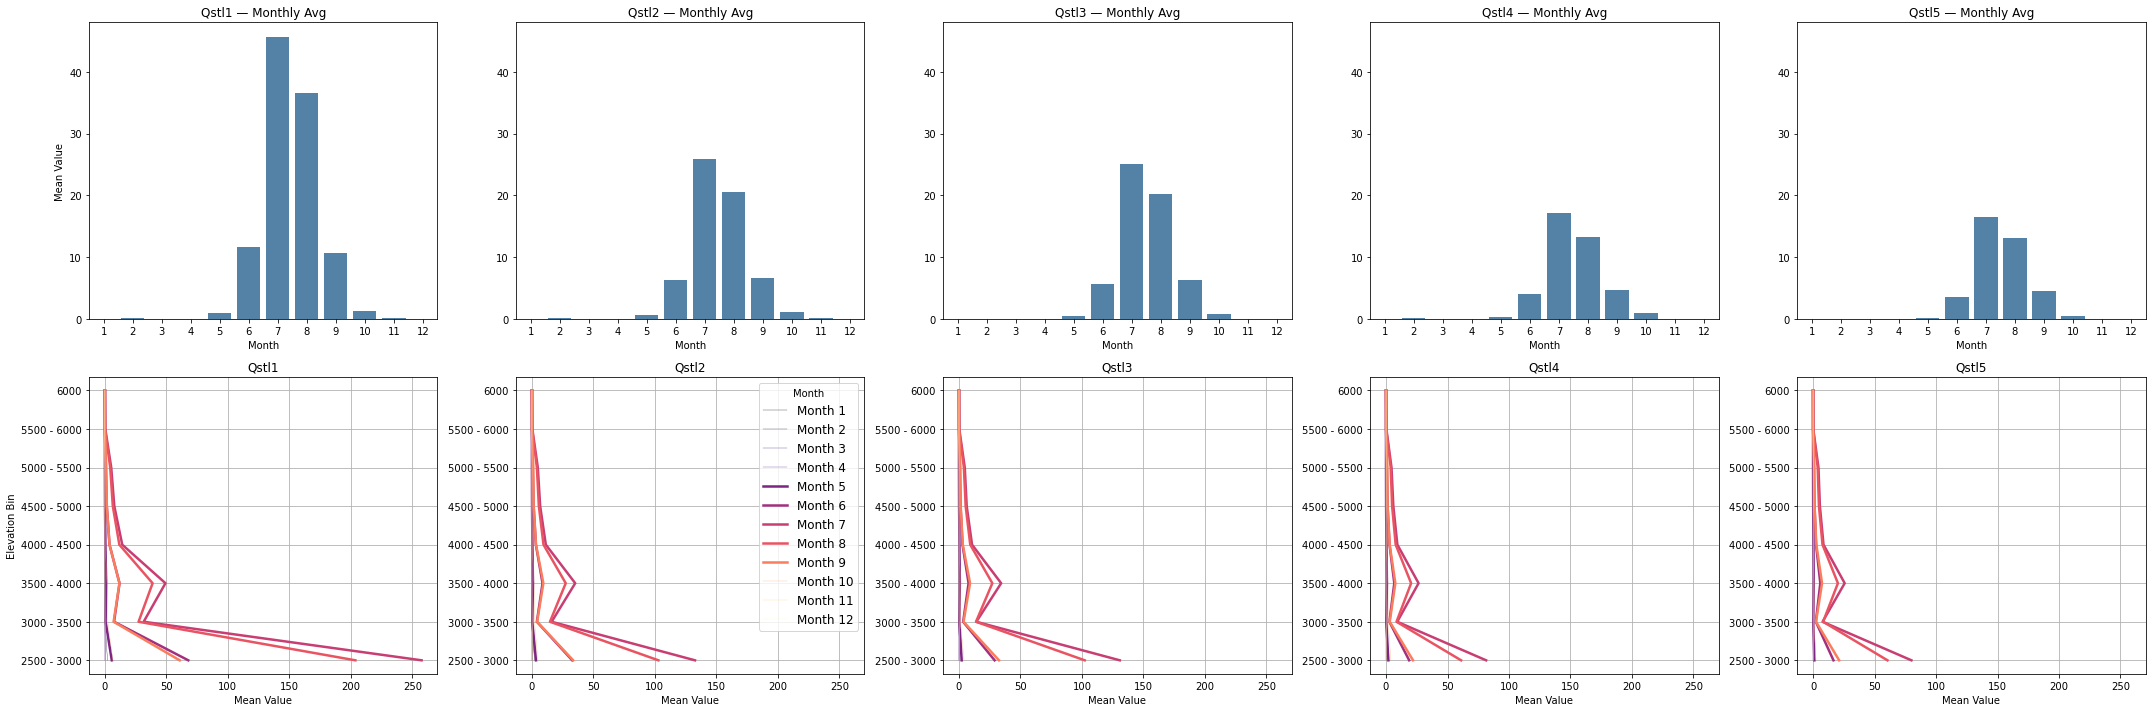

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

# Melt the combined_df
mean_df = combined_dfm.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Get unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
elevation_bins = sorted(mean_df['elevation_bin'].unique())
num_vars = len(variables)

# Color map for line plots
cmap = cm.get_cmap('magma', len(months))
colors = [cmap(i) for i in range(len(months))]

# Create figure
fig = plt.figure(figsize=(6*num_vars, 10))

# Create subplots manually
bar_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plots (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)

    # Line plots (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots (monthly mean) ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()

    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )

    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')

# --- Bottom row: line plots per month ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for j, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[j],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')

# Add legend to first line plot (bottom-left)
line_axes[1].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize=12,
)

plt.tight_layout()
plt.show()


,month,elevation_bin,Qstl1,Qstl2,Qstl3,Qstl4,Qstl5
0,1,2500,0.425430,0.418901,0.112147,0.608376,0.107545
1,1,2500 - 3000,0.318141,0.415614,0.110148,0.416845,0.107474
2,1,3000 - 3500,0.000000,0.000000,0.000000,0.000000,0.000000
3,1,3500 - 4000,0.000000,0.000000,0.000000,0.000000,0.000000
4,1,4000 - 4500,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...
103,12,4000 - 4500,0.000000,0.000000,0.000000,0.000000,0.000000
104,12,4500 - 5000,0.000000,0.000000,0.000000,0.000000,0.000000
105,12,5000 - 5500,0.000000,0.000000,0.000000,0.000000,0.000000
106,12,5500 - 6000,0.000000,0.000000,0.000000,0.000000,0.000000


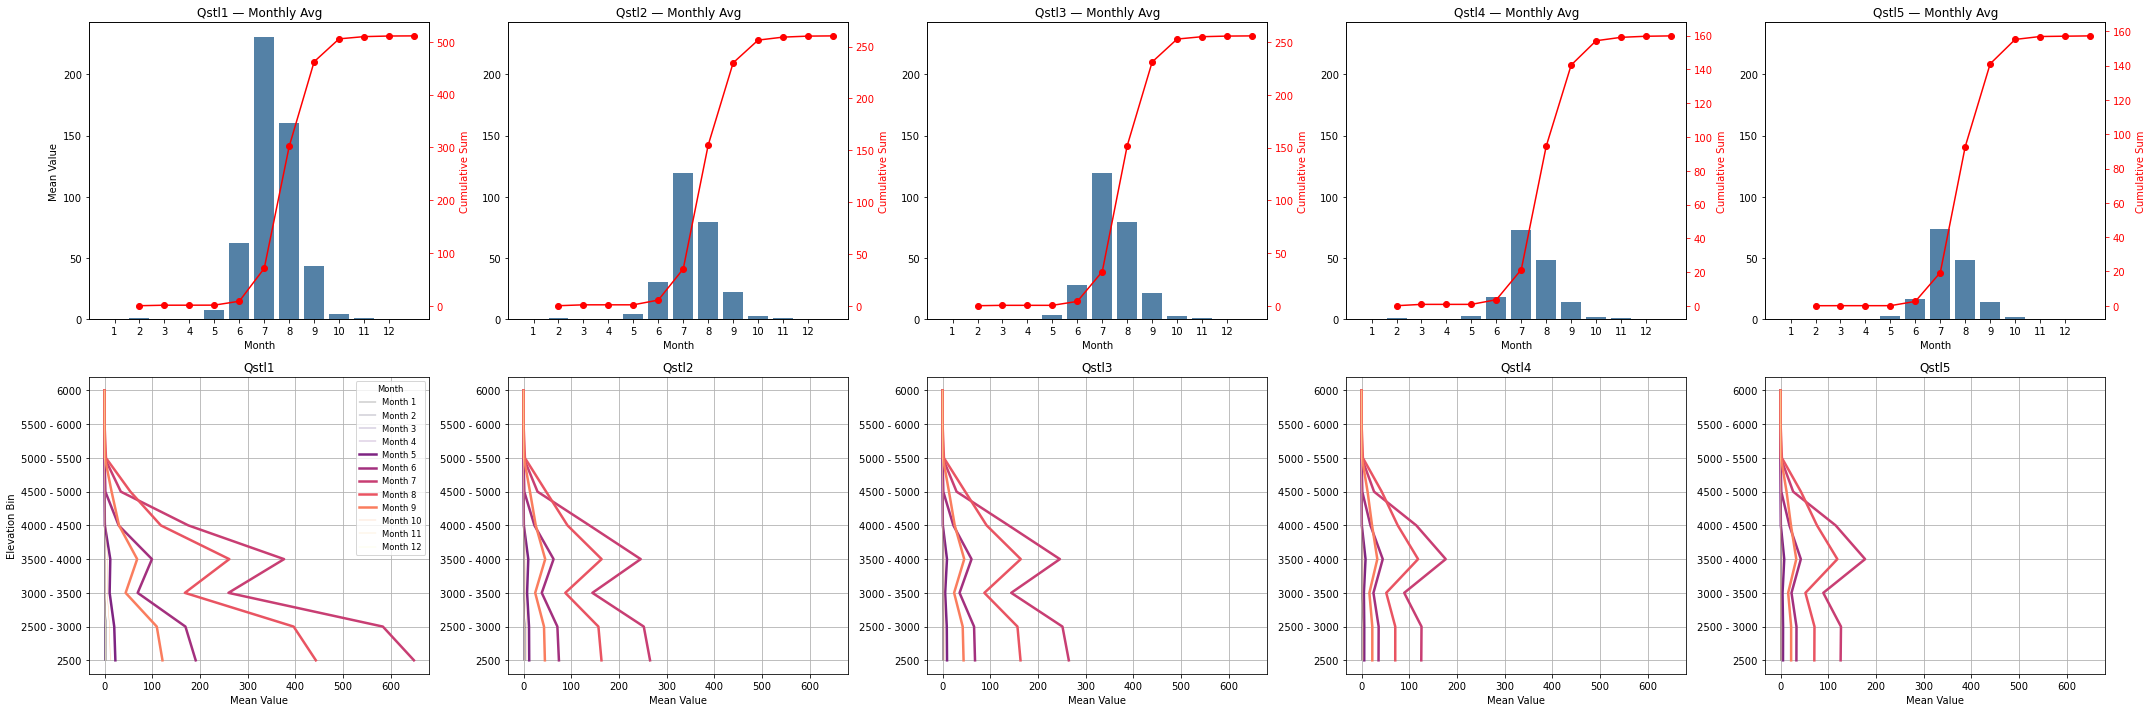

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
import numpy as np

# Melt the combined_df
mean_df = combined_df.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
num_vars = len(variables)

# Color map for line plots
cmap = cm.get_cmap('magma', len(months))
colors = [cmap(i) for i in range(len(months))]

fig = plt.figure(figsize=(6*num_vars, 10))

bar_axes = []
bar_sec_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plot axes (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)
    
    # Add secondary y-axis
    ax_bar_sec = ax_bar.twinx()
    bar_sec_axes.append(ax_bar_sec)

    # Line plot axes (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    ax_sec = bar_sec_axes[i]
    
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()

    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )

    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')





# ---------- ADD DF COUNT HERE ------------
    
    # Example: let's plot cumulative sum on secondary axis (just as demonstration)
    cumsum = df_monthly['value'].cumsum()
    ax_sec.plot(df_monthly['month'], cumsum, color='red', marker='o')
    ax_sec.set_ylabel('Cumulative Sum', color='red')
    ax_sec.tick_params(axis='y', colors='red')

# -----------------------------------------








# --- Bottom row: line plots ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for j, month in enumerate(months):
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in [5, 6, 7, 8, 9] else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[j],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')

# Legend for line plots
line_axes[0].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize='small',
    title_fontsize='small'
)

plt.tight_layout()
plt.show()


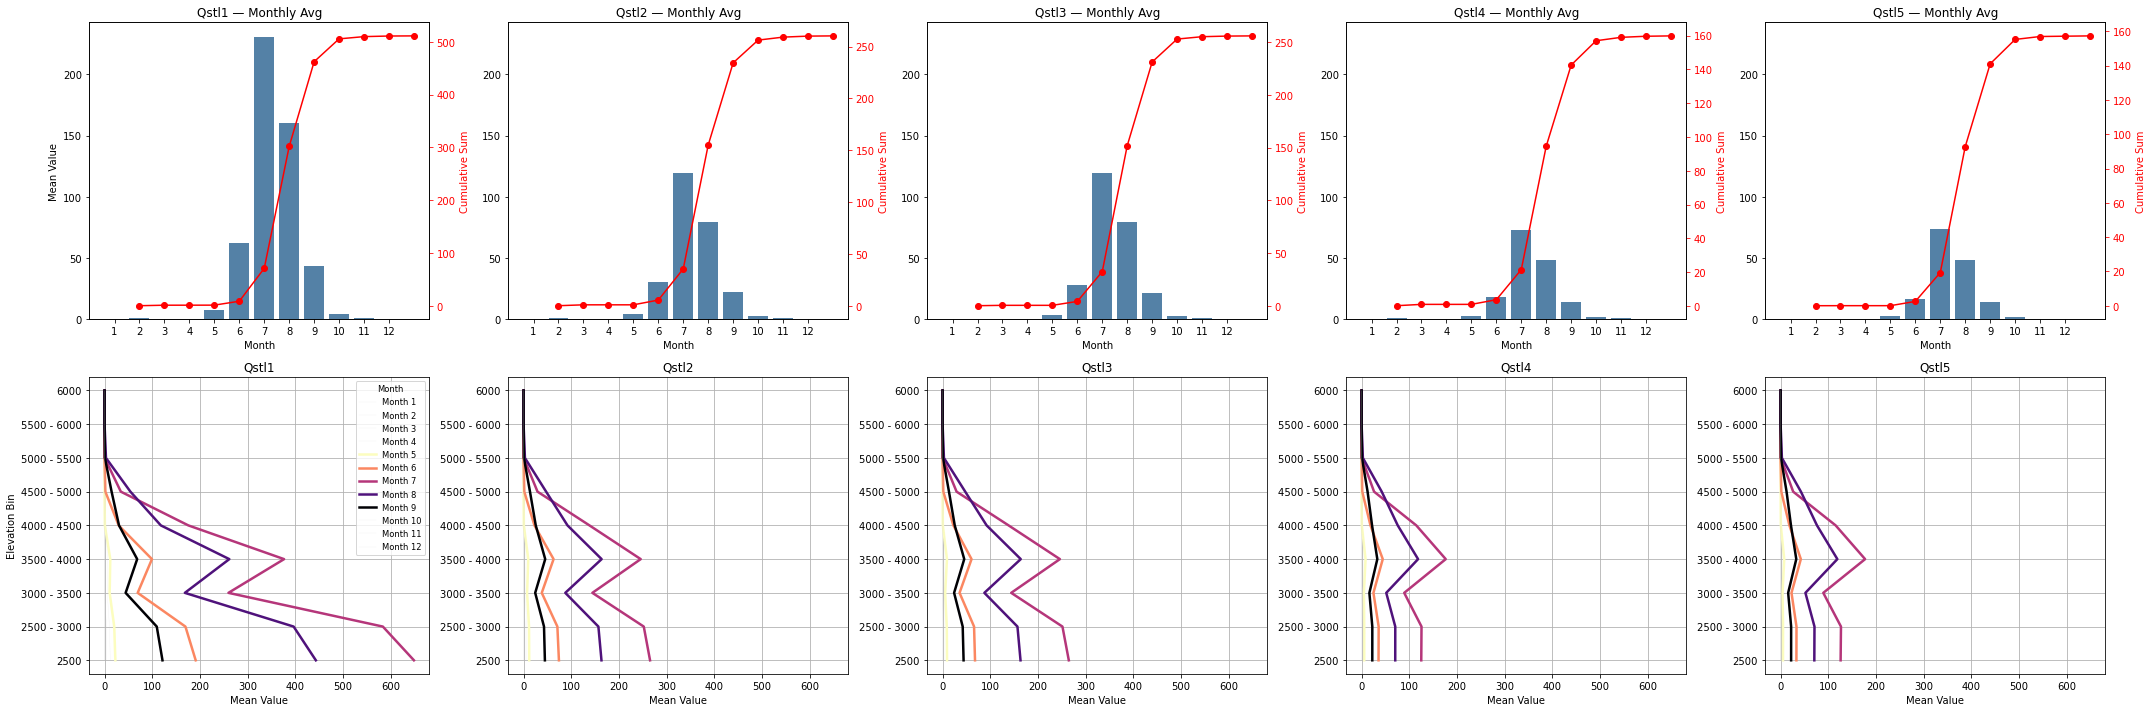

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import cm
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
import numpy as np

# Melt the combined_df
mean_df = combined_df.melt(id_vars=['month', 'elevation_bin'], 
                           var_name='variable', 
                           value_name='value')

# Unique values
variables = mean_df['variable'].unique()
months = sorted(mean_df['month'].unique())
num_vars = len(variables)

# Define colormap stretch for highlighted months (5–9)
highlight_months = [5, 6, 7, 8, 9]
cmap = cm.get_cmap('magma_r', len(highlight_months))

# Assign colors
colors = {}
for month in months:
    if month in highlight_months:
        idx = highlight_months.index(month)
        colors[month] = cmap(idx)
    else:
        colors[month] = (0.8, 0.8, 0.8, 0.3)  # light gray

# Create figure
fig = plt.figure(figsize=(6*num_vars, 10))

bar_axes = []
bar_sec_axes = []
line_axes = []

for i in range(num_vars):
    # Bar plot axes (top row), share y-axis
    sharey_bar = bar_axes[0] if i > 0 else None
    ax_bar = fig.add_subplot(2, num_vars, i + 1, sharey=sharey_bar)
    bar_axes.append(ax_bar)
    
    # Add secondary y-axis
    ax_bar_sec = ax_bar.twinx()
    bar_sec_axes.append(ax_bar_sec)

    # Line plot axes (bottom row), share x-axis
    sharex_line = line_axes[0] if i > 0 else None
    ax_line = fig.add_subplot(2, num_vars, num_vars + i + 1, sharex=sharex_line)
    line_axes.append(ax_line)

# --- Top row: bar plots ---
for i, var in enumerate(variables):
    ax = bar_axes[i]
    ax_sec = bar_sec_axes[i]
    
    df_var = mean_df[mean_df['variable'] == var]
    df_monthly = df_var.groupby('month')['value'].mean().reset_index()

    sns.barplot(
        data=df_monthly,
        x='month',
        y='value',
        color='steelblue',
        ax=ax
    )

    ax.set_title(f'{var} — Monthly Avg')
    ax.set_xlabel('Month')
    if i == 0:
        ax.set_ylabel('Mean Value')
    else:
        ax.set_ylabel('')





# ---------- ADD DF COUNT HERE ------------
    # Secondary axis: example cumulative sum
    cumsum = df_monthly['value'].cumsum()
    ax_sec.plot(df_monthly['month'], cumsum, color='red', marker='o')
    ax_sec.set_ylabel('Cumulative Sum', color='red')
    ax_sec.tick_params(axis='y', colors='red')

# ------------------------------------------



# --- Bottom row: line plots ---
for i, var in enumerate(variables):
    ax = line_axes[i]
    df_var = mean_df[mean_df['variable'] == var]

    for month in months:
        df_month = df_var[df_var['month'] == month]
        lw = 2.5 if month in highlight_months else 0.3

        ax.plot(
            df_month['value'],
            df_month['elevation_bin'],
            label=f'Month {month}',
            color=colors[month],
            linewidth=lw
        )

    ax.set_title(f'{var}')
    ax.set_xlabel('Mean Value')
    ax.grid(True)
    if i == 0:
        ax.set_ylabel('Elevation Bin')
    else:
        ax.set_ylabel('')

# Legend for line plots
line_axes[0].legend(
    title='Month',
    loc='upper right',
    frameon=True,
    fontsize='small',
    title_fontsize='small'
)


plt.tight_layout()
plt.show()


# COUNT - LANGTANG

In [81]:

def group_data(data, landcover_idx):
    grouped = (
        data.groupby(['month', 'elevation_bin'])['dfcount']
        .mean()
        .reset_index()
    )
    # Rename the 'Qstl' column to include the landcover index
    grouped = grouped.rename(columns={'dfcount': f'dfcount{landcover_idx}'})
    return grouped

dataframes = [TL1, TL2, TL3, TL4, TL5]
grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx)
    grouped_dfs.append(grouped)


from functools import reduce

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_df_count = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)

# COUNT MUSTANG

In [83]:
dataframes = [TL1m, TL2m, TL3m, TL4m, TL5m]
grouped_dfs = []

for idx, df in enumerate(dataframes, start=1):
    grouped = group_data(df, landcover_idx=idx)
    grouped_dfs.append(grouped)


from functools import reduce

# Combine all grouped_dfs into one by merging on 'month' and 'elevation_bin'
combined_df_count = reduce(
    lambda left, right: pd.merge(left, right, on=['month', 'elevation_bin'], how='outer'),
    grouped_dfs
)